In [ ]:
RAW_CSV = 'clean_data_small.csv'

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df_raw = pd.read_csv('clean_data_small.csv', usecols=['id', 'date_creat', 'nature', 'groupement', 'titre', 'titre_court', 'objet', 'objet_social1', 'adrg_codepostal'])
df_raw['departement'] = df_raw['adrg_codepostal'].astype(str).str[:2]
df_i = df_raw[df_raw.departement == '38']
df_i.to_csv('asso_isere.csv', header=True)

In [16]:
df_i = pd.read_csv('asso_isere.csv')
df_i.head(5)

,Unnamed: 0,id,date_creat,nature,groupement,titre,titre_court,objet,objet_social1,adrg_codepostal,departement
0,232,W381005836,1969-05-02,D,S,FEDERATION NATIONALE DES ACCIDENTES DU TRAVAIL...,F.N..A.T.H.,amélioration du sort des victimes d'accidents ...,17055,38160.0,38
1,279,W383000183,1999-03-09,D,S,TRACTO'DAK,TRACTO'DAK,PORTER SECOURS AUX PAYS DU TIER MONDE,20000,38150.0,38
2,726,W381007536,2009-02-18,D,S,L'OREILLE INTERNE,L'OREILLE INTERNE,promotion du jazz et des musiques actuelles,6030,38100.0,38
3,925,W383008518,2019-05-06,D,S,ANB COURSES,ANB COURSES,participer aux courses automobiles de rallye e...,11160,38200.0,38
4,1079,W381010836,2010-11-19,D,S,JARDINS FAMILIAUX RENAGEOIS,JARDINS FAMILIAUX RENAGEOIS,promotion et développement de la culture des j...,7070,38140.0,38


In [17]:
df_i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29672 entries, 0 to 29671
Data columns (total 11 columns):
Unnamed: 0         29672 non-null int64
id                 29672 non-null object
date_creat         29672 non-null object
nature             29672 non-null object
groupement         29672 non-null object
titre              29672 non-null object
titre_court        29670 non-null object
objet              29672 non-null object
objet_social1      29672 non-null int64
adrg_codepostal    29672 non-null float64
departement        29672 non-null int64
dtypes: float64(1), int64(3), object(7)
memory usage: 2.5+ MB


Select the associations based in Grenoble and add a parameter for the creation year

In [6]:
df_i.adrg_codepostal = df_i.adrg_codepostal.astype(int)
df_g = df_i[df_i.adrg_codepostal.isin([38000,38100])]
df_g = df_g.assign(annee_creat=df_g['date_creat'].astype(str).str[:4])
df_g.head(2)

,Unnamed: 0,id,date_creat,nature,groupement,titre,titre_court,objet,objet_social1,adrg_codepostal,departement
2,726,W381007536,2009-02-18,D,S,L'OREILLE INTERNE,L'OREILLE INTERNE,promotion du jazz et des musiques actuelles,6030,38100,38
6,1166,W381004646,1992-11-16,D,S,"PHOEBUS, CENTRE INTER-EUROPEEN DE RECHERCHE CU...",PHOEBUS,développement des relations inter-européennes ...,9050,38000,38


In [7]:
df_g.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4427 entries, 2 to 29670
Data columns (total 11 columns):
Unnamed: 0         4427 non-null int64
id                 4427 non-null object
date_creat         4427 non-null object
nature             4427 non-null object
groupement         4427 non-null object
titre              4427 non-null object
titre_court        4427 non-null object
objet              4427 non-null object
objet_social1      4427 non-null int64
adrg_codepostal    4427 non-null int64
departement        4427 non-null int64
dtypes: int64(4), object(7)
memory usage: 415.0+ KB


Save number of association per year of creation

In [11]:
df_g_y = df_g.groupby(['annee_creat']).count()['id']
df_g_y.name = 'count'
df_g_y.index.name = 'annee'
df_g_y.drop(df_g_y.tail(1).index,inplace=True)
df_g_y.to_csv('nb_asso_per_year.csv', header=True)
df_g_y.tail(5)

annee
2014    234
2015    238
2016    226
2017    256
2018    262
Name: count, dtype: int64

Bar chart representing the number of associations created by year

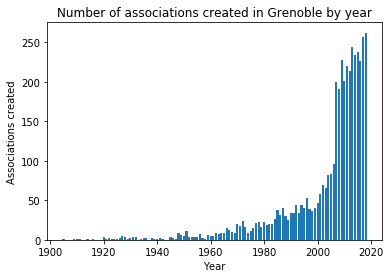

,annee,count
96,2014,234
97,2015,238
98,2016,226
99,2017,256
100,2018,262


In [15]:
df = pd.read_csv('nb_asso_per_year.csv')

df['annee'] = pd.to_numeric(df['annee'], errors='coerce')

x = df['annee']
y = df['count']
plt.bar(x, y)
plt.xlabel('Year')
plt.ylabel('Associations created')
plt.title('Number of associations created in Grenoble by year')

plt.show()